# Shop Customer - Classification

[**Data by SHRUTI_IYYER from Kaggle**](https://www.kaggle.com/datasets/shrutimechlearn/customer-data)

A project to predict if a customer is 'good', which I defined as a customer that has a Spending Score equal or above 50.

*Import the most important libraries*

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the Dataset

In [238]:
dataset = pd.read_csv('Customers.csv')
dataset.drop(columns=['CustomerID'], inplace=True)
dataset.insert(loc=4, column='GoodCustomer', value=(dataset.Spending_Score.values > 50).astype(int))

In [239]:
dataset

,Genre,Age,Annual_Income_(k$),Spending_Score,GoodCustomer
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


Selecting the dependent and independent variables. As independent variables I select the Annual Income and the Age.

In [240]:
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, -1].values

Splitting the data into a Training and Test set: 

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Apply Feature Scaling to the values: 

In [242]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

Train the Logistic Regression algorithm: 

In [243]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Identify the categories of the test data with the trained classifier: 

In [244]:
y_pred = classifier.predict(X_test)

Create a confusion matrix and calculate the accuracy score to evaluate the model:

In [245]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test, y_pred)
print(cm_log)

acc_log = accuracy_score(y_test, y_pred)
acc_log

[[23  4]
 [ 8 15]]


0.76

This Logistic Regression Model gets 76 % of the predictions right. In the next step, this is visualized.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


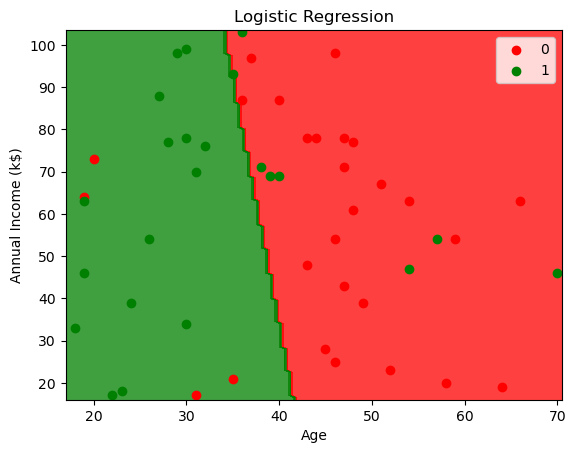

In [246]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

These results suggest that a "good customer" is most likely someone below 40. The income doesn't seem to effect if someone classifies as a "good customer".

## K-Nearest Neighbour (K-NN)

Train the K-NN model that uses the Euclidean Distance as metric and 5 as number of neighbors 

In [247]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(
    n_neighbors=5, 
    metric='minkowski'
)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Use the trained model to make predictions on the Test set:

In [248]:
y_pred = classifier.predict(X_test)

Calculate the confusion matrix and the accuracy score: 

In [249]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

[[20  7]
 [ 7 16]]


0.72

So the KNN model gets 72 % of the predictions right.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


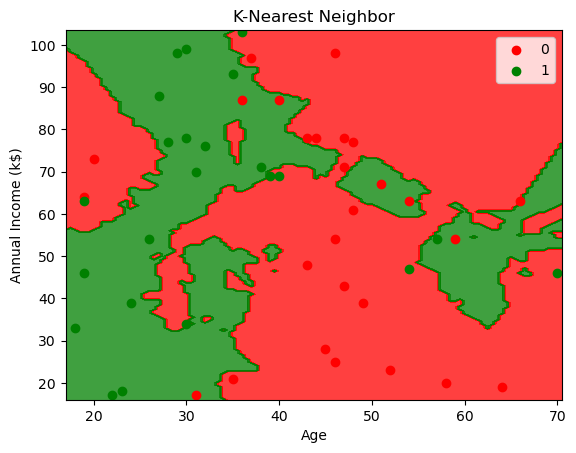

In [250]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbor')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

This time there is no clear distinction between old and young customers. It could be that customers over 40 with a medium Annual Income (40k-70k) are also 'good customers', but there's also the danger that this is just the case because the classifier was overfitted to the training set.

Let's use k-Fold Cross Validation with 10 folds to investigate this further:

In [251]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print('Accuracy Mean: {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f}'.format(accuracies.std() * 100))

Accuracy Mean: 57.33 %
Standard Deviation: 13.40


The accuracy means over 10 train-test-folds with 57.33 % is actually a lot lower than the accuracy of the Test set predictions with 72 %. Additionally, there is a standard deviation with results in an accuracy of **(57.33 ± 13.40) %**. 

## Support Vector Machine (SVM)

Train the Support Vector Machine (SVM) model with an Radial Basis Function kernel.

In [252]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Predict the classifications on the Test set:

In [253]:
y_pred = classifier.predict(X_test)

Calculate the Confusion matrix and the accuracy score: 

In [254]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)

acc_svm = accuracy_score(y_test, y_pred)
acc_svm

[[22  5]
 [ 4 19]]


0.82

This SVM model with the rbf-kernel get's 82 % of the predictions right. Let's see it visualized!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


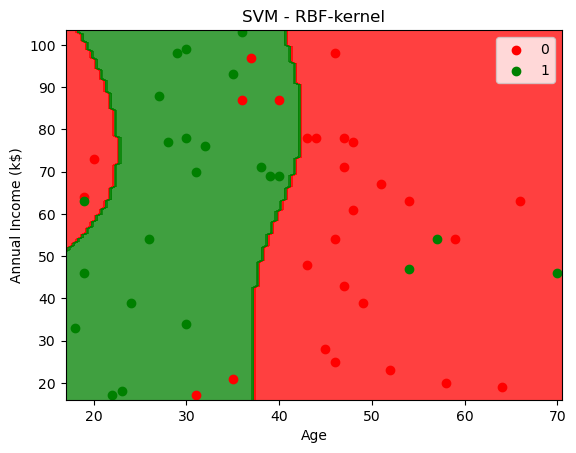

In [255]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM - RBF-kernel')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

Interestingly this model also does a significant split at around 40 to classify that customers under 40 usually have a Spending Score above 50. Additionally, the SVM model allows for carving out an area for very young customers (under 20) with a high Annual Income. 

## Naive Bayes

Train the Gaussian Naive Bayes model on the Training set:

In [256]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Make predictions with the trained model on the Test set:

In [257]:
y_pred = classifier.predict(X_test)

Calculate the confusion matrix and the accuracy score:

In [258]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

acc_nb = accuracy_score(y_test, y_pred)
acc_nb

[[21  6]
 [ 5 18]]


0.78

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


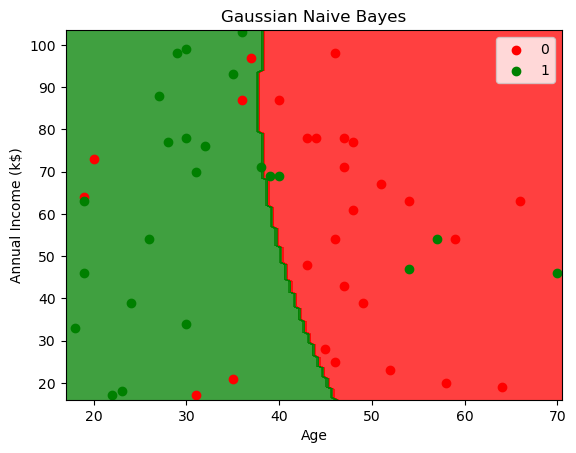

In [259]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

The Gaussian Naive Bayes model gets an accuracy score of 78 % when making predictions on the Test set.

## Decision Tree Classification

Train the Decision Tree Classification model: 

In [260]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Make predictions & calculate the metrics: 

In [261]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

cm_tree = confusion_matrix(y_test, y_pred)
print(cm_tree)

acc_tree = accuracy_score(y_test, y_pred)
acc_tree

[[22  5]
 [ 5 18]]


0.8

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


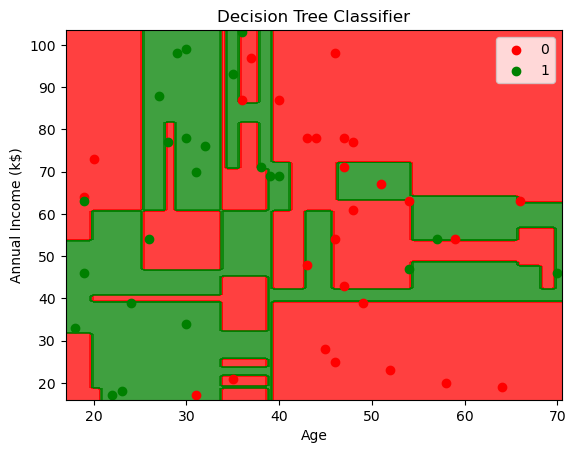

In [262]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

The Decision Tree Classification model gets an accuracy of 80 %.

## Random Forest Classification

Train the Random Forest Classification with 10 trees:

In [263]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Make predictions: 

In [264]:
y_pred = classifier.predict(X_test)

Calculate the metrics:

In [265]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_forest = confusion_matrix(y_test, y_pred)
print(cm_forest)

acc_forest = accuracy_score(y_test, y_pred)
acc_forest

[[24  3]
 [ 4 19]]


0.86

With 10 trees the Random Forest Classification achieves a score of 86 % accuracy!

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


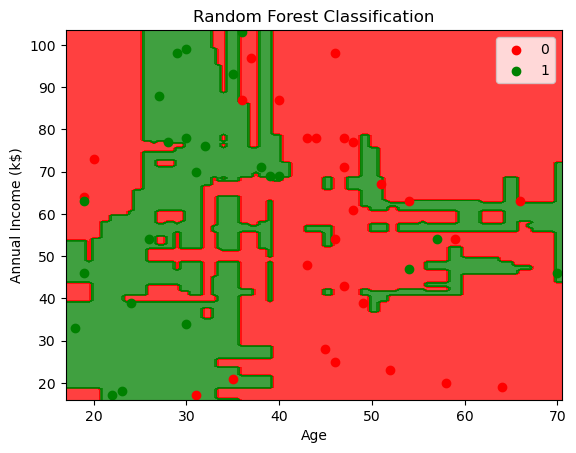

In [266]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

## **Comparison**

Let's compare the accuracy of the different models!

**Logistic Regression**

In [267]:
print(f'Confusion Matrix: {cm_log}')
print('Accuracy Score: {:.2f} %'.format(acc_log * 100))

Confusion Matrix: [[23  4]
 [ 8 15]]
Accuracy Score: 76.00 %


**K-Nearest Neighbour (K-NN)**

In [268]:
print(f'Confusion Matrix: {cm_knn}')
print('Accuracy Score: {:.2f} %'.format(acc_knn * 100))

Confusion Matrix: [[20  7]
 [ 7 16]]
Accuracy Score: 72.00 %


**Support Vector Machine (SVM)**

In [269]:
print(f'Confusion Matrix: {cm_svm}')
print('Accuracy Score: {:.2f} %'.format(acc_svm * 100))

Confusion Matrix: [[22  5]
 [ 4 19]]
Accuracy Score: 82.00 %


**Naive Bayes**

In [270]:
print(f'Confusion Matrix: {cm_nb}')
print('Accuracy Score: {:.2f} %'.format(acc_nb * 100))

Confusion Matrix: [[21  6]
 [ 5 18]]
Accuracy Score: 78.00 %


**Decision Tree Classification**

In [271]:
print(f'Confusion Matrix: {cm_tree}')
print('Accuracy Score: {:.2f} %'.format(acc_tree * 100))

Confusion Matrix: [[22  5]
 [ 5 18]]
Accuracy Score: 80.00 %


**Random Forest Classification**

In [272]:
print(f'Confusion Matrix: {cm_forest}')
print('Accuracy Score: {:.2f} %'.format(acc_forest * 100))

Confusion Matrix: [[24  3]
 [ 4 19]]
Accuracy Score: 86.00 %


### All Scores: 

In [273]:
print('Random Forest Classifier: {:.2f} %'.format(acc_forest * 100))
print('Support Vector Machine: {:.2f} %'.format(acc_svm * 100))
print('Decision Tree Classifier: {:.2f} %'.format(acc_tree * 100))
print('Gaussian Naive Bayes: {:.2f} %'.format(acc_nb * 100))
print('Logistic Regression: {:.2f} %'.format(acc_log * 100))
print('K-Nearest Neighbor: {:.2f} %'.format(acc_knn * 100))

Random Forest Classifier: 86.00 %
Support Vector Machine: 82.00 %
Decision Tree Classifier: 80.00 %
Gaussian Naive Bayes: 78.00 %
Logistic Regression: 76.00 %
K-Nearest Neighbor: 72.00 %


So trained on this Training set and measured by the prediction that each model made on the Test set, the Random Forest Classifier with 10 trees is the most precise model with 86 %. Second, comes the Support Vector Machine model with 82 %, and third, the Decision Tree Classifier with 80 %. 

Let's compare all the graphics at last:

<img src="Classification_IMG/LogisticRegression.png" alt="Logistic Regression Plot" />
<img src="Classification_IMG/KNN.png" alt="k-Nearest Neighbor Plot" />
<img src="Classification_IMG/SVM.png" alt="Support Vector Machine Plot" />
<img src="Classification_IMG/NaiveBayes.png" alt="Gaussian Naive Bayes Plot" />
<img src="Classification_IMG/DecisionTree.png" alt="Decision Tree Classification Plot" />
<img src="Classification_IMG/RandomForest.png" alt="Random Forest Classification Plot" />